In [2]:
from sklearn.svm import SVC #svm
from sklearn.svm import LinearSVC #线性
import sklearn.datasets as datasets
import numpy as np
iris = datasets.load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [3]:
x_train = iris.data[:,:2]
y_train = iris.target
estimator = [SVC(kernel="linear"),
             SVC(kernel="rbf"),
             SVC(kernel="poly"),
             LinearSVC()] #四种算法模型
x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
x, y = np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x, y)
xy_test = np.c_[xx.ravel(), yy.ravel()]

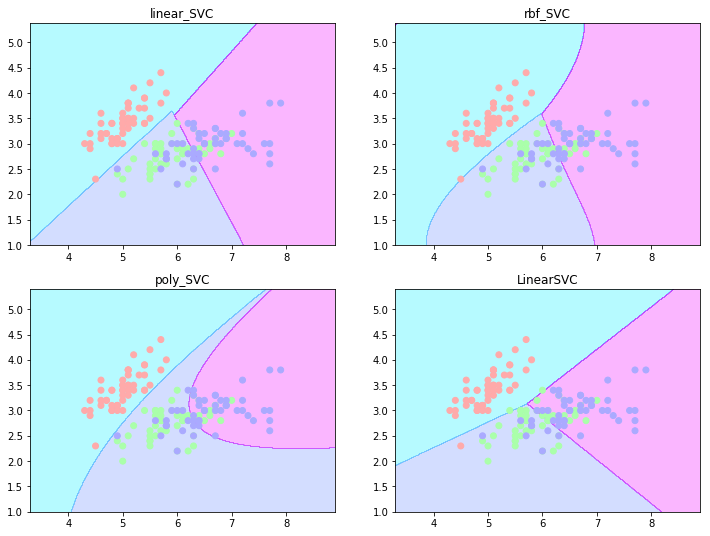

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
titles = ["linear_SVC", "rbf_SVC", "poly_SVC", "LinearSVC"]
plt.figure(figsize=(12,9))
color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) #颜色
for i,svc in enumerate(estimator): #遍历每一个算法模型
    svc.fit(x_train, y_train) #训练
    y_new = svc.predict(xy_test) #预测数据
    z = y_new.reshape(yy.shape)
    plt.subplot(2, 2, (i+1))
    plt.title(titles[i])
    plt.contourf(xx, yy, z, cmap="cool", alpha=0.3) #绘制轮廓
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=color)